In [1]:
import importlib

import pandas as pd
import numpy as np
from classify import compute_classification_metrics, classify_trajectories
from utils.db_tools import metrics_grid, get_data
from scipy.fft import fft, fftfreq

import utils.db_tools as db_tools
importlib.reload(db_tools)

<module 'utils.db_tools' from '/cluster/home/vogtva/pde-solvers-cuda/analysis/utils/db_tools.py'>

In [2]:
df1 = pd.read_csv('sample_data/osc.csv')
df1["label"] = "osc"
df2 = pd.read_csv('sample_data/ss.csv')
df2["label"] = "ss"

# from visual inspection
osc_rows = np.r_[0:4, 6:9, 10, 13:20, 21:28, 29, 31:34, 35, 37, 39:48, 49:52, 53, 55:58, 59]

df_mix = pd.read_csv('sample_data/mix.csv')
df_mix_osc = df_mix.iloc[osc_rows]
df_mix_osc["label"] = "osc"

df_dss = df_mix.drop(index=osc_rows)
df_dss["label"] = "dss"

/scratch/tmp.25012043.vogtva/ipykernel_1998843/1412930917.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix_osc["label"] = "osc"


In [3]:
df = pd.concat([df1, df2, df_mix_osc, df_dss])
df = df.reset_index();

In [4]:
df = compute_classification_metrics(df)

In [5]:
df_class = classify_trajectories(df)

In [6]:
for label, df1 in df_class.groupby("label"):
    print(label, df1.value_counts("category"))

dss category
INT    15
Name: count, dtype: int64
osc category
OSC    76
Name: count, dtype: int64
ss category
SS     51
DSS     8
Name: count, dtype: int64


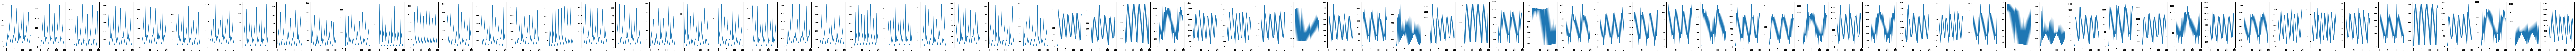

In [8]:
df1 = df_class[(df_class["category"] == "OSC")]
metrics_grid(df1, 0, var1="", metric="dev", show_title=False);